#### Imports

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# acquire
import wrangle as w
import env
import explore

# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [2]:
# Acquire Data
df = w.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
#Prepare Data
df = w.prep_telco(df)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [4]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges',
       'contract_type', 'internet_service_type', 'payment_type',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contr

In [5]:
#Split data and set target variable
target = 'churn'
train, validate, test = w.train_validate_test_split(df, target)

In [6]:
#Check length of train, validate, test
print(len(train))
print(len(validate))
print(len(test))

4922
1055
1055


In [7]:
#Describe the data
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,0.163145,32.549573,64.640583,2279.278230,0.495530,0.491670,0.301910,0.903088,0.590207,0.265949,...,0.380333,0.220033,0.390492,0.208046,0.245632,0.438643,0.220033,0.224096,0.335636,0.224502
std,0.369536,24.563833,30.096846,2254.640564,0.500031,0.499981,0.459133,0.295868,0.491845,0.441882,...,0.485518,0.414310,0.487910,0.405951,0.430505,0.496271,0.414310,0.417028,0.472260,0.417296
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.150000,400.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.300000,1398.975000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,89.850000,3810.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Get data types of columns
train.dtypes

gender                                    object
senior_citizen                             int64
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                         object
monthly_charges                          float64
total_charges                            float64
contract_type                             object
internet_service_type                     object
payment_type                              object
gender_encoded                             int64
partner_encoded     

In [9]:
num_vars = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']
cat_vars = ['gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection', \
            'tech_support', 'streaming_tv', 'streaming_movies','paperless_billing','contract_type','internet_service_type', \
            'payment_type']

gender
Male      2483
Female    2439
Name: gender, dtype: int64
Male      50.446973
Female    49.553027
Name: gender, dtype: float64


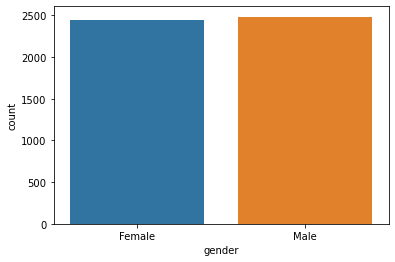

partner
No     2502
Yes    2420
Name: partner, dtype: int64
No     50.832995
Yes    49.167005
Name: partner, dtype: float64


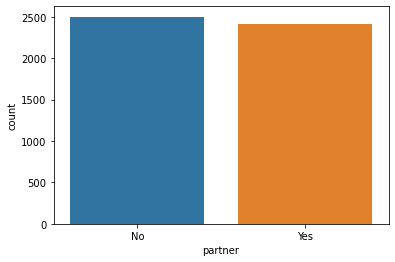

dependents
No     3436
Yes    1486
Name: dependents, dtype: int64
No     69.809021
Yes    30.190979
Name: dependents, dtype: float64


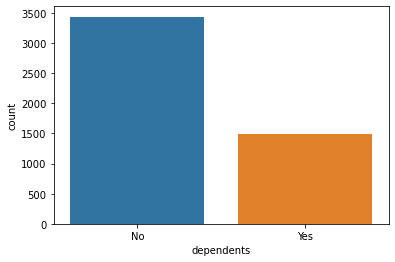

phone_service
Yes    4445
No      477
Name: phone_service, dtype: int64
Yes    90.308818
No      9.691182
Name: phone_service, dtype: float64


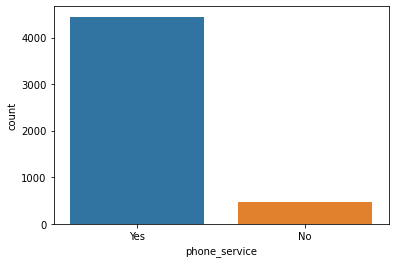

multiple_lines
No                  2392
Yes                 2053
No phone service     477
Name: multiple_lines, dtype: int64
No                  48.598131
Yes                 41.710687
No phone service     9.691182
Name: multiple_lines, dtype: float64


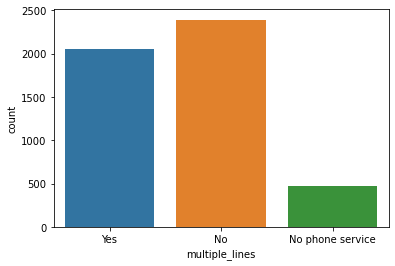

online_security
No                     2437
Yes                    1402
No internet service    1083
Name: online_security, dtype: int64
No                     49.512393
Yes                    28.484356
No internet service    22.003251
Name: online_security, dtype: float64


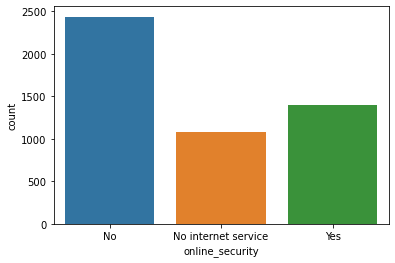

online_backup
No                     2141
Yes                    1698
No internet service    1083
Name: online_backup, dtype: int64
No                     43.498578
Yes                    34.498171
No internet service    22.003251
Name: online_backup, dtype: float64


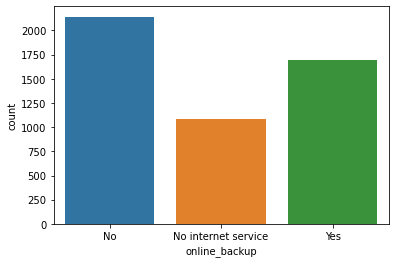

device_protection
No                     2137
Yes                    1702
No internet service    1083
Name: device_protection, dtype: int64
No                     43.417310
Yes                    34.579439
No internet service    22.003251
Name: device_protection, dtype: float64


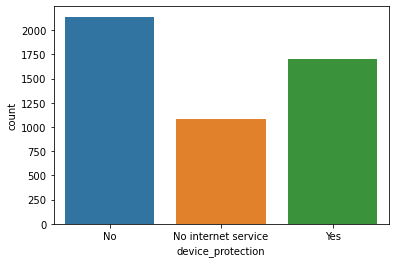

tech_support
No                     2406
Yes                    1433
No internet service    1083
Name: tech_support, dtype: int64
No                     48.882568
Yes                    29.114181
No internet service    22.003251
Name: tech_support, dtype: float64


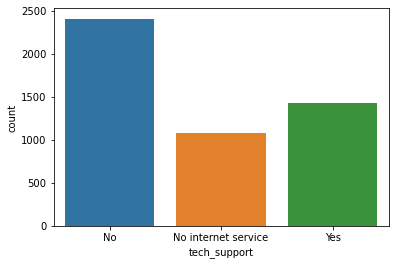

streaming_tv
No                     1967
Yes                    1872
No internet service    1083
Name: streaming_tv, dtype: int64
No                     39.963430
Yes                    38.033320
No internet service    22.003251
Name: streaming_tv, dtype: float64


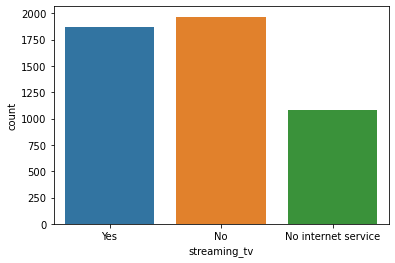

streaming_movies
Yes                    1922
No                     1917
No internet service    1083
Name: streaming_movies, dtype: int64
Yes                    39.049167
No                     38.947582
No internet service    22.003251
Name: streaming_movies, dtype: float64


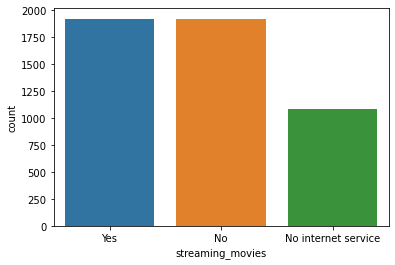

paperless_billing
Yes    2905
No     2017
Name: paperless_billing, dtype: int64
Yes    59.020723
No     40.979277
Name: paperless_billing, dtype: float64


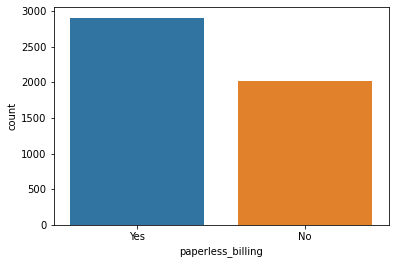

contract_type
Month-to-month    2689
Two year          1209
One year          1024
Name: contract_type, dtype: int64
Month-to-month    54.632263
Two year          24.563186
One year          20.804551
Name: contract_type, dtype: float64


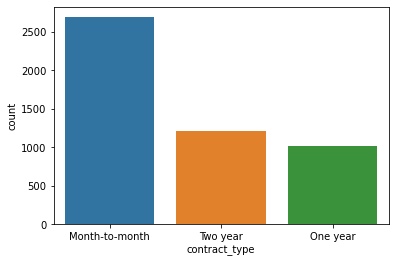

internet_service_type
Fiber optic    2159
DSL            1680
None           1083
Name: internet_service_type, dtype: int64
Fiber optic    43.864283
DSL            34.132466
None           22.003251
Name: internet_service_type, dtype: float64


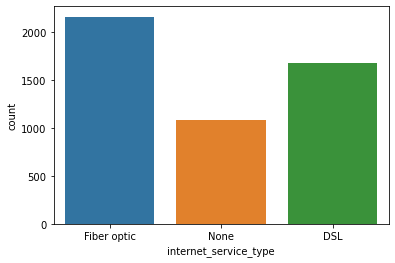

payment_type
Electronic check             1652
Mailed check                 1105
Credit card (automatic)      1103
Bank transfer (automatic)    1062
Name: payment_type, dtype: int64
Electronic check             33.563592
Mailed check                 22.450223
Credit card (automatic)      22.409590
Bank transfer (automatic)    21.576595
Name: payment_type, dtype: float64


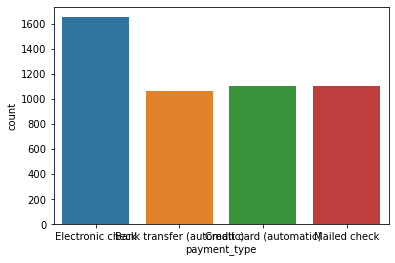

In [10]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

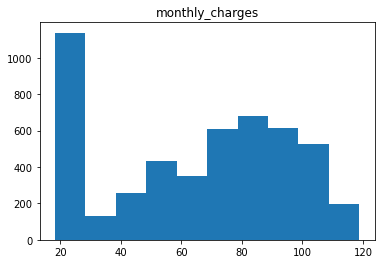

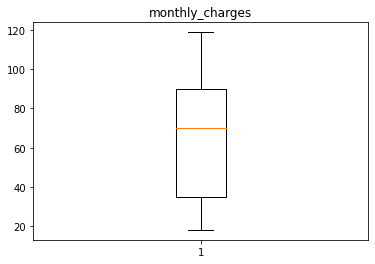

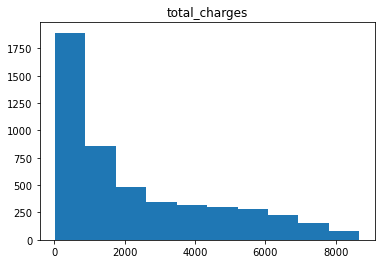

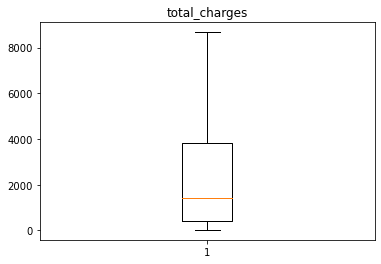

In [11]:
# Visualize float columns
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

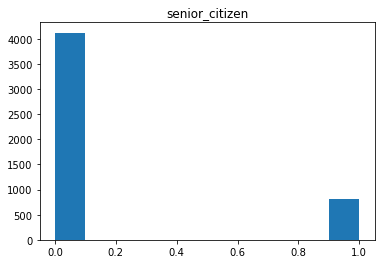

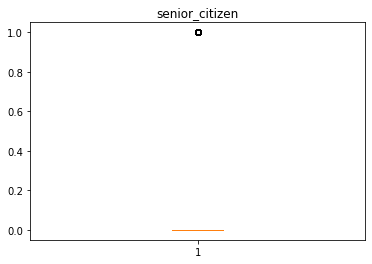

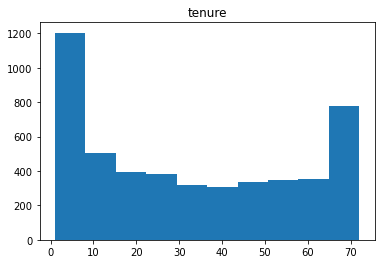

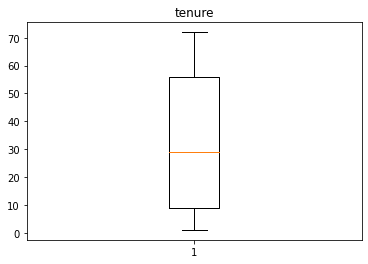

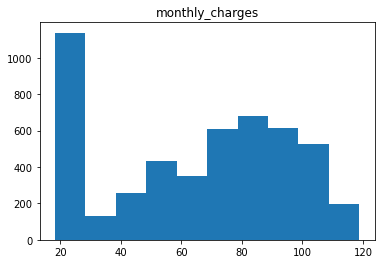

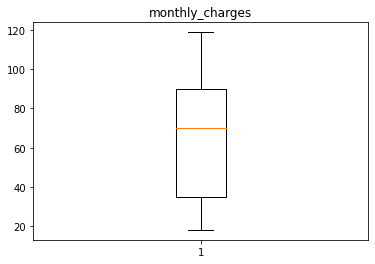

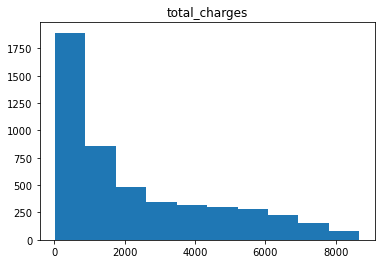

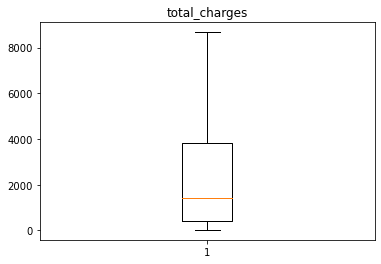

In [12]:
#Visualize other numeric data
# Plot numeric columns
for col in num_vars:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [13]:
#Target variable value counts
train.churn.value_counts()

0    3613
1    1309
Name: churn, dtype: int64

### Bivariate Analysis

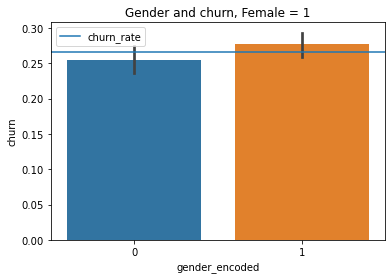

In [14]:
#Looking at relationship between gender and churn

plt.title("Gender and churn, Female = 1")
sns.barplot(x="gender_encoded", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### 1. Gender_Encoded (female ==1) vs. Churn:

Hypotheses:

H^0: The churn rate of women is less than or equal to the chrn rate of men.

H^a: The churn rate of women is greater than the churn rate of men

In [15]:
# Chi-Square test to compare two categorical variables (Gender and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of women is less than or equal to the chrn rate of men."
alternative_hypothesis = "The churn rate of women is greater than the churn rate of men."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['gender_encoded'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Fail to reject the null
Insufficient evidence to reject the null


#### Conclusion for gender: not a significant difference for churn rate

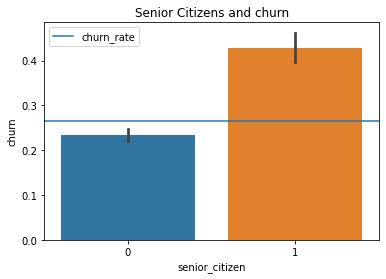

In [16]:
#Looking at relationship between senior citizens and churn

plt.title("Senior Citizens and churn")
sns.barplot(x="senior_citizen", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### Senior Citizen vs. Churn:

Hypotheses:

H^0: The churn rate of senior citizens is less than or equal to the churn rate of non-senior citizens.

H^a: The churn rate of senior citizens is greater than the churn rate of non-senior citizens.

In [17]:
# Chi-Square test to compare two categorical variables (Senior Citizen Status and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of senior citizens is less than or equal to the churn rate of non-senior citizens."
alternative_hypothesis = "The churn rate of senior citizens is greater than the churn rate of non-senior citizens."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['senior_citizen'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that The churn rate of senior citizens is less than or equal to the churn rate of non-senior citizens.
Sufficient evidence to move forward understanding that The churn rate of senior citizens is greater than the churn rate of non-senior citizens.


### Churn rate of senior citizens vs non-senior citizens is significant

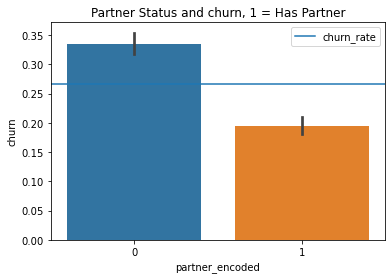

In [18]:
#Looking at relationship between partnered customers and churn

plt.title("Partner Status and churn, 1 = Has Partner")
sns.barplot(x="partner_encoded", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### 1. Partner_encoded (has partner ==1) vs. Churn:

Hypotheses:

H^0: The churn rate of partnered customers is greater than or equal to the churn rate of single customers.

H^a: The churn rate of partnered customers is less than the churn rate of single customers.

In [19]:
# Chi-Square test to compare two categorical variables (Partner and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of partnered customers is greater than or equal to the churn rate of single customers."
alternative_hypothesis = "The churn rate of partnered customers is less than the churn rate of single customers."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['partner_encoded'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that The churn rate of partnered customers is greater than or equal to the churn rate of single customers.
Sufficient evidence to move forward understanding that The churn rate of partnered customers is less than the churn rate of single customers.


### Conclusion for partner status: significant relationship

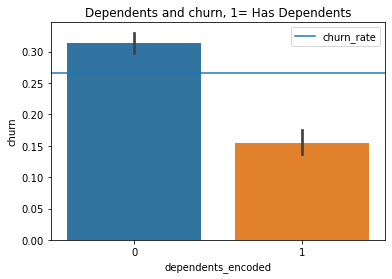

In [20]:
#Looking at relationship between dependents and churn

plt.title("Dependents and churn, 1= Has Dependents")
sns.barplot(x="dependents_encoded", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### Has Dependents vs. Churn:

Hypotheses:

H^0: The churn rate of those with dependents is greater than or equal to those without dependents.

H^a: The churn rate of those with dependents is less than those without dependents.

In [21]:
# Chi-Square test to compare two categorical variables (Senior Citizen Status and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of those with dependents is greater than or equal to those without dependents."
alternative_hypothesis = "The churn rate of those with dependents is less than those without dependents."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['senior_citizen'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

7.8439372513347e-30

In [22]:
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that The churn rate of those with dependents is greater than or equal to those without dependents.
Sufficient evidence to move forward understanding that The churn rate of those with dependents is less than those without dependents.


### Contract Type vs. Churn:

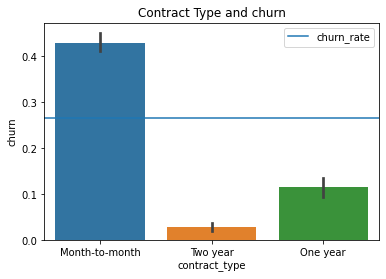

In [23]:
#Looking at relationship between contract type and churn

plt.title("Contract Type and churn")
sns.barplot(x="contract_type", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### Establish Hypothesis: Contract_Type

Hypotheses:

H^0: The churn rate of those on a month-to-month contract is less than or equal to other customers.

H^a: The churn rate of those on a month-to-month contract is greater than other customers.

In [24]:
# Chi-Square test to compare two categorical variables (Senior Citizen Status and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of those on a month-to-month contract is less than or equal to other customers."
alternative_hypothesis = "The churn rate of those on a month-to-month contract is greater than other customers."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['contract_type'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.5618058560756162e-182

In [25]:
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that The churn rate of those on a month-to-month contract is less than or equal to other customers.
Sufficient evidence to move forward understanding that The churn rate of those on a month-to-month contract is greater than other customers.


## Examining Numeric variables vs discrete (Churn)

In [26]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,Female,0,No,No,50,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,0,1,0
1756,Male,0,No,No,4,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
4669,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,1,0
2379,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,1,0,0,0,0
4118,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,No,...,1,0,0,0,0,1,0,1,0,0


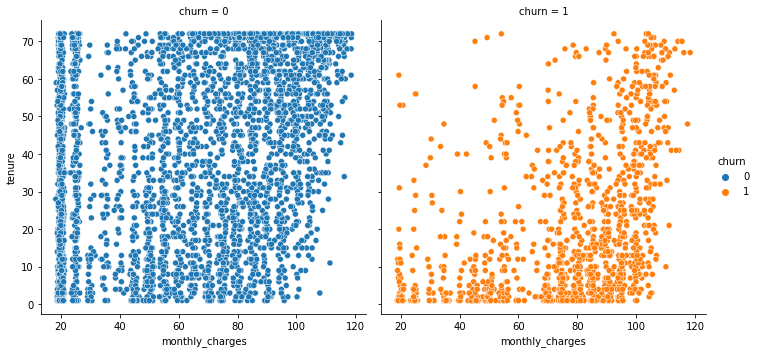

In [27]:
sns.relplot(data=train, x='monthly_charges', y='tenure', kind='scatter', hue='churn', col='churn')

<AxesSubplot:xlabel='churn', ylabel='tenure'>

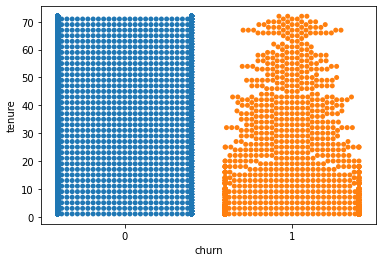

In [28]:
sns.swarmplot(data=train, x='churn', y='tenure')

### Looking at tenure vs. churn rate

In [29]:
# Subset the data into churn and not-churned status
not_churned = train[train.churn == 0]
churned = train[train.churn == 1]

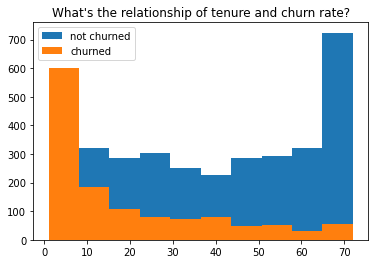

In [30]:
plt.title("What's the relationship of tenure and churn rate?")
plt.hist(not_churned.tenure, label="not churned")
plt.hist(churned.tenure, label="churned")
plt.legend()
plt.show()

#### It appears that customers with a longer tenure churn less

#### Establish Hypotheses:

$H_0$ : null_hypothesis = "Customers with a higher tenure have a churn rate less than or equal to those with a shorter tenure."

$H_a$: alternative_hypothesis = "Customers with a higher tenure have a lower churn rate than those with shorter tenure."

In [31]:
# check variances of the two groups
not_churned.tenure.var(), churned.tenure.var()

(581.7647560688213, 389.679911831285)

In [32]:
#Need to ensure variances are equal
stat, pval = stats.levene(not_churned.tenure, churned.tenure)
pval
# pval is significant so we can conclude variances are NOT equal

1.7397543077146337e-58

In [33]:
# Two-sample T-test to compare a continuous variable (tenure) with a categorical variable (churn)
alpha = 0.05
null_hypothesis = "Customers with a higher tenure have a churn rate greater than or equal to those with a shorter tenure."
alternative_hypothesis = "Customers with a higher tenure have a lower churn rate than those with shorter tenure."

# Setup test
t, p = stats.ttest_ind(not_churned.tenure, churned.tenure, equal_var=False)
t, p

(28.50778830481801, 3.210034358004407e-157)

In [34]:
if (p < alpha) & (t > 0):
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")

Reject the null hypothesis that Customers with a higher tenure have a churn rate greater than or equal to those with a shorter tenure.
Sufficient evidence to move forward understanding that Customers with a higher tenure have a lower churn rate than those with shorter tenure.


### Conclusion: Customers with a longer tenure (in months) have a lower churn rate than customers with lower tenures

### Looking at monthly charges relationship to churn rate

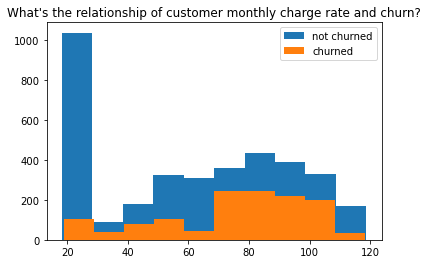

In [35]:
plt.title("What's the relationship of customer monthly charge rate and churn?")
plt.hist(not_churned.monthly_charges, label="not churned")
plt.hist(churned.monthly_charges, label="churned")
plt.legend()
plt.show()

<AxesSubplot:xlabel='monthly_charges'>

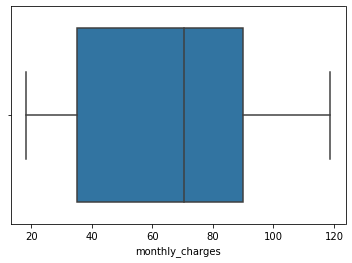

In [36]:
sns.boxplot(x='monthly_charges', data=train)

#### It appears that customers who have higher monthly charges churn less?

$H_0$ : null_hypothesis = "Customers with higher monthly charges have churn rate greater than or equal to those with a lower charges."

$H_a$: alternative_hypothesis = "Customers with higher monthly charges have a different churn rate than those with lower monthly charges."

In [37]:
# check variances of the two groups
not_churned.monthly_charges.var(), churned.monthly_charges.var()

(965.508171621473, 603.4479280323469)

In [38]:
#Need to ensure variances are equal
stat, pval = stats.levene(not_churned.monthly_charges, churned.monthly_charges)
pval
# pval is significant so we can conclude variances are NOT equal

1.5630731582434918e-57

In [39]:
# Two-sample T-test to compare a continuous variable (tenure) with a categorical variable (churn)
alpha = 0.05
null_hypothesis = "Customers with higher monthly charges have churn rate greater than or equal to those with a lower charges."
alternative_hypothesis = "Customers with higher monthly charges have a different churn rate than those with lower monthly charges."

# Setup test
t, p = stats.ttest_ind(not_churned.monthly_charges, churned.monthly_charges, equal_var=False)
t, p

(-16.074976262764665, 8.990395123213902e-56)

In [40]:
if (p/2 < alpha):
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")

Reject the null hypothesis that Customers with higher monthly charges have churn rate greater than or equal to those with a lower charges.
Sufficient evidence to move forward understanding that Customers with higher monthly charges have a different churn rate than those with lower monthly charges.


### Modeling

In [41]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,Female,0,No,No,50,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,0,1,0
1756,Male,0,No,No,4,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
4669,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,1,0
2379,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,1,0,0,0,0
4118,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,No,...,1,0,0,0,0,1,0,1,0,0


In [42]:
#Function to drop columns not needed for modeling

def model_prep(train,validate,test):
    # Drop duplicate columns
    train = train.drop(columns=['gender','partner','dependents','phone_service','multiple_lines','online_security',\
                    'online_backup','device_protection','tech_support','streaming_tv', 'streaming_movies',\
                    'paperless_billing', 'churn','contract_type','internet_service_type','payment_type'], inplace=True)
    validate = validate.drop(columns=['gender','partner','dependents','phone_service','multiple_lines','online_security',\
                    'online_backup','device_protection','tech_support','streaming_tv', 'streaming_movies',\
                    'paperless_billing', 'churn','contract_type','internet_service_type','payment_type'], inplace=True)
    test = test.drop(columns=['gender','partner','dependents','phone_service','multiple_lines','online_security',\
                    'online_backup','device_protection','tech_support','streaming_tv', 'streaming_movies',\
                    'paperless_billing', 'churn','contract_type','internet_service_type','payment_type'], inplace=True)
    
    return train,validate,test

In [43]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,Female,0,No,No,50,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,0,1,0
1756,Male,0,No,No,4,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
4669,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,1,0
2379,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,1,0,0,0,0
4118,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,No,...,1,0,0,0,0,1,0,1,0,0


In [44]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,Female,0,No,No,50,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,0,1,0
1756,Male,0,No,No,4,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
4669,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,1,0
2379,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,1,0,0,0,0
4118,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,No,...,1,0,0,0,0,1,0,1,0,0


In [45]:
def target_splitter(train,validate,test):
    X_train = train.drop(columns=['churn'])
    y_train = train.churn

    X_validate = validate.drop(columns=['churn'])
    y_validate = validate.churn

    X_test = test.drop(columns=['churn'])
    y_test = test.churn
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [50]:
X_train, y_train, X_validate, y_validate, X_test, y_test= target_splitter(train,validate,test)

In [53]:
X_train

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,Female,0,No,No,50,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,0,1,0
1756,Male,0,No,No,4,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
4669,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,1,0
2379,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,1,0,0,0,0
4118,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,No,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,Female,0,No,No,3,No,No phone service,No,Yes,No,...,1,0,1,0,0,0,0,0,1,0
426,Male,0,No,No,65,Yes,Yes,Yes,No,No,...,0,0,1,1,0,1,0,0,1,0
2823,Male,0,No,No,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6578,Female,1,No,No,26,Yes,No,No,No,No,...,0,0,1,0,0,1,0,0,1,0
